In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'mordred3dinputfinal.csv')
df.shape




C:\Users\91830\AppData\Local\Temp\ipykernel_17436\2246016351.py:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,53,54,55,56,57,58,59,60,61,141,142,150,151,152,153,154,155,156,157,158,168,169,177,178,186,187,195,196,204,205,213,214,222,223,231,232,233,234,235,236,237,238,239,240,241,260,261,262,263,264,265,266,267,268,341,342,343,344,345,346,347,348,349,357,358,366,367,368,369,370,371,372,373,374,384,385,393,394,402,403,411,412,420,421,429,430,438,439,447,448,449,450,451,452,453,454,455,456,463,464,471,472,473,474,475,476,477,478,487,488,495,496,503,504,511,512,519,520,527,528,535,536,543,544,545,546,547,548,549,550,551,552,559,560,567,568,569,570,571,572,573,574,583,584,591,592,599,600,607,608,615,616,623,624,631,632,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,7

(1741, 1827)

In [4]:
df.head(10)
df=df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
df=df.replace(np.nan, 0)
df = df.dropna()
X = df.drop("class", axis=1)
y = df["class"]
#Spliting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)


In [5]:
from imblearn.combine import SMOTEENN
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train,y_train)
X_test_smenn, y_test_smenn = smenn.fit_resample(X_test,y_test)
counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 1004, 1: 388})
After Counter({1: 807, 0: 596})


In [6]:
#Algorithm 1: SVM 
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from numpy import std
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_smenn, y_train_smenn)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  10.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.0min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   5.1s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.7s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.7s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.7s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.7s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.1s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.4s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.4s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.5s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.3s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.4s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ...................

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
SVC = SVC(C=0.1, gamma=1, kernel='poly',probability=True)
SVC.fit(X_train_smenn, y_train_smenn)
y_predsvm = SVC.predict(X_test_smenn)
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predsvm).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predsvm)
accuracy = balanced_accuracy_score(y_test_smenn, y_predsvm)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predsvm)
precision = precision_score(y_test_smenn, y_predsvm).mean()
roc_auc = roc_auc_score(y_test_smenn, y_predsvm)
f1 = f1_score(y_test_smenn, y_predsvm)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)



Accuracy:  0.5

MCC: 0.0

Sensitivity:  1.0

Specificity:  0.0

Recall:  1.0

Precision:  0.6574074074074074

Area under the ROC curve:  0.5

F1 score:  0.7932960893854749


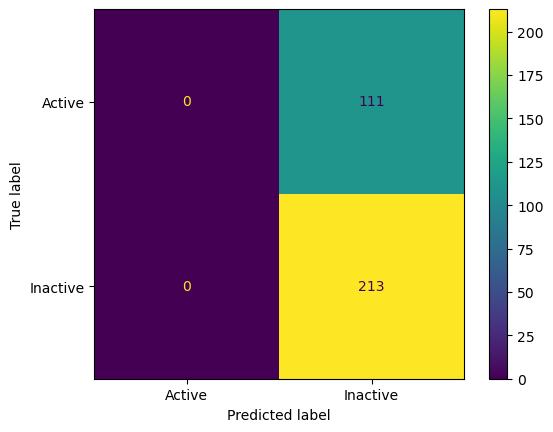

In [8]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_smenn, y_predsvm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [9]:
#Algorithm 3: Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Create the parameter grid based on the results of random search 
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=rf,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
gd_sr.fit(X_train_smenn, y_train_smenn)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 800}


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(bootstrap=False, n_estimators=800, criterion="entropy")
rf1.fit(X_train_smenn, y_train_smenn)
y_predrf1 = rf1.predict(X_test_smenn)
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predrf1).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predrf1)
accuracy = balanced_accuracy_score(y_test_smenn, y_predrf1)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predrf1)
precision = precision_score(y_test_smenn, y_predrf1)
roc_auc = roc_auc_score(y_test_smenn, y_predrf1)
f1 = f1_score(y_test_smenn, y_predrf1)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)


Accuracy:  0.866704732901916

MCC: 0.7160971769362496

Sensitivity:  0.8685446009389671

Specificity:  0.8648648648648649

Recall:  0.8685446009389671

Precision:  0.925

Area under the ROC curve:  0.866704732901916

F1 score:  0.8958837772397094


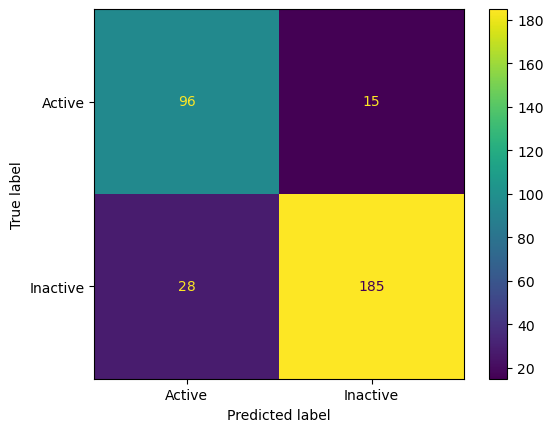

In [11]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, y_predrf1)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [12]:
#Algorithm 3: MLP
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
mlp_grid = GridSearchCV(mlp, parameter_space, cv=10, scoring='accuracy')
mlp_grid.fit(X_train_smenn, y_train_smenn)
best_parameters = mlp_grid.best_params_
print(best_parameters)

C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\91830\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\91830\anaconda3\lib\site-packages\sklearn\utils\extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [13]:
mlp1 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100,), activation = 'relu',solver='adam', learning_rate = 'constant')
mlp1.fit(X_train_smenn, y_train_smenn)
y_predmlp1 = mlp1.predict(X_test_smenn)
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predmlp1).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predmlp1)
accuracy = balanced_accuracy_score(y_test_smenn, y_predmlp1)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predmlp1)
precision = precision_score(y_test_smenn, y_predmlp1)
roc_auc = roc_auc_score(y_test_smenn, y_predmlp1)
f1 = f1_score(y_test_smenn, y_predmlp1)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)



Accuracy:  0.8124603476716152

MCC: 0.6198036582116345

Sensitivity:  0.8591549295774648

Specificity:  0.7657657657657657

Recall:  0.8591549295774648

Precision:  0.8755980861244019

Area under the ROC curve:  0.8124603476716152

F1 score:  0.8672985781990521


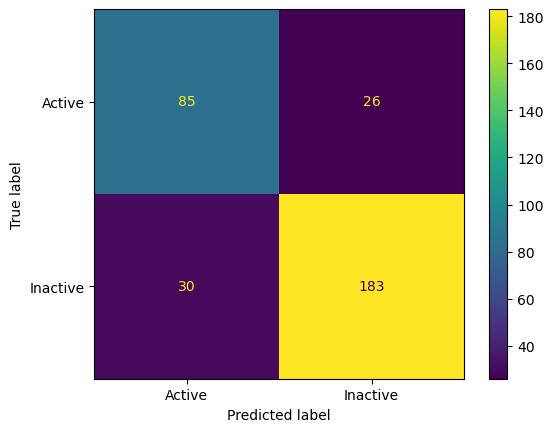

In [14]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, y_predmlp1)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

GBC = GradientBoostingClassifier()
parameters = { 'n_estimators' : [100,200,300,400,500]}
  

grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 10, n_jobs=-1)
grid_GBC.fit(X_train_smenn, y_train_smenn)


print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)




 The best estimator across ALL searched params:
 GradientBoostingClassifier(n_estimators=500)


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=500)
gb_clf.fit(X_train_smenn, y_train_smenn)
predictions = gb_clf.predict(X_test_smenn)
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, predictions).ravel()
MCC = matthews_corrcoef(y_test_smenn, predictions)
accuracy = balanced_accuracy_score(y_test_smenn, predictions)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, predictions)
precision = precision_score(y_test_smenn, predictions)
roc_auc = roc_auc_score(y_test_smenn, predictions)
f1 = f1_score(y_test_smenn, predictions)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)


Accuracy:  0.9056591803070677

MCC: 0.7946703246646544

Sensitivity:  0.9014084507042254

Specificity:  0.9099099099099099

Recall:  0.9014084507042254

Precision:  0.9504950495049505

Area under the ROC curve:  0.9056591803070677

F1 score:  0.9253012048192771


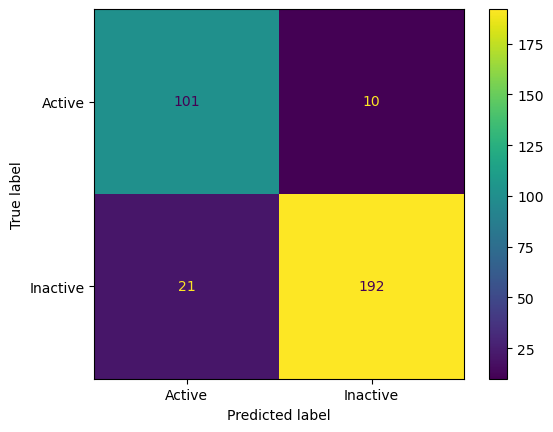

In [17]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ada=AdaBoostClassifier()
search_grid={'n_estimators':[200,500,1000,1500, 2000],'learning_rate':[0.0001,0.001,0.01,.1,1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)
search.fit(X_train_smenn, y_train_smenn)
search.best_params_

{'learning_rate': 1, 'n_estimators': 1000}

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate=1, n_estimators=1000)
ada_clf.fit(X_train_smenn, y_train_smenn)
adapred = ada_clf.predict(X_test_smenn)
#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, adapred).ravel()
MCC = matthews_corrcoef(y_test_smenn, adapred)
accuracy = balanced_accuracy_score(y_test_smenn, adapred)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, adapred)
precision = precision_score(y_test_smenn, adapred)
roc_auc = roc_auc_score(y_test_smenn, adapred)
f1 = f1_score(y_test_smenn, adapred)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)


Accuracy:  0.9009643446263165

MCC: 0.7829989893143767

Sensitivity:  0.892018779342723

Specificity:  0.9099099099099099

Recall:  0.892018779342723

Precision:  0.95

Area under the ROC curve:  0.9009643446263165

F1 score:  0.9200968523002421


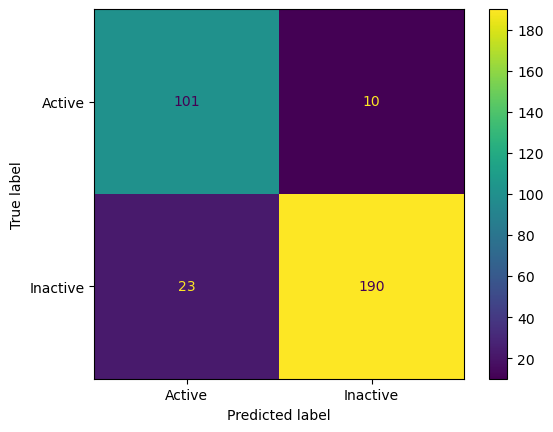

In [24]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, adapred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb=xgb.XGBClassifier()
search_grid={'n_estimators':[200,500,1000,1500, 2000]}
search=GridSearchCV(estimator=xgb,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=10)
search.fit(X_train_smenn, y_train_smenn)
search.best_params_


{'n_estimators': 500}


Accuracy:  0.8759040730871717

MCC: 0.7352037843675411

Sensitivity:  0.8779342723004695

Specificity:  0.8738738738738738

Recall:  0.8779342723004695

Precision:  0.9303482587064676

Area under the ROC curve:  0.8759040730871717

F1 score:  0.9033816425120773


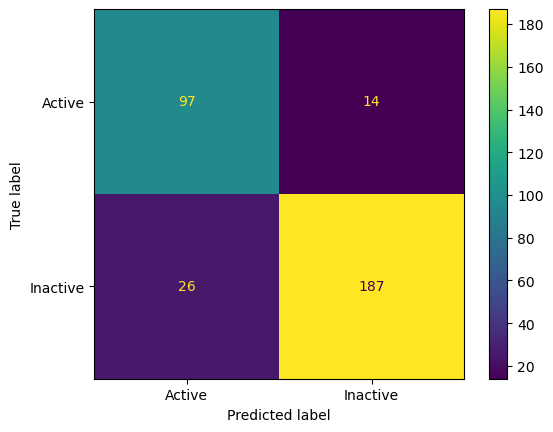

In [26]:
#XGBoost classifer 
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic",n_estimators=500)
xgb_model.fit(X_train_smenn, y_train_smenn)

y_predxgb = xgb_model.predict(X_test_smenn)

#Model Evaluation
tn, fp, fn, tp = confusion_matrix(y_test_smenn, y_predxgb).ravel()
MCC = matthews_corrcoef(y_test_smenn, y_predxgb)
accuracy = balanced_accuracy_score(y_test_smenn, y_predxgb)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
recall = recall_score(y_test_smenn, y_predxgb)
precision = precision_score(y_test_smenn, y_predxgb)
roc_auc = roc_auc_score(y_test_smenn, y_predxgb)
f1 = f1_score(y_test_smenn, y_predxgb)
print('\nAccuracy: ', accuracy)
print('\nMCC:', MCC)
print('\nSensitivity: ', sensitivity)
print('\nSpecificity: ', specificity)
print('\nRecall: ', recall)
print('\nPrecision: ', precision)
print('\nArea under the ROC curve: ', roc_auc)
print('\nF1 score: ', f1)
#confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_smenn, y_predxgb)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Active','Inactive'])
cmd.plot()

In [28]:
from sklearn.svm import SVC

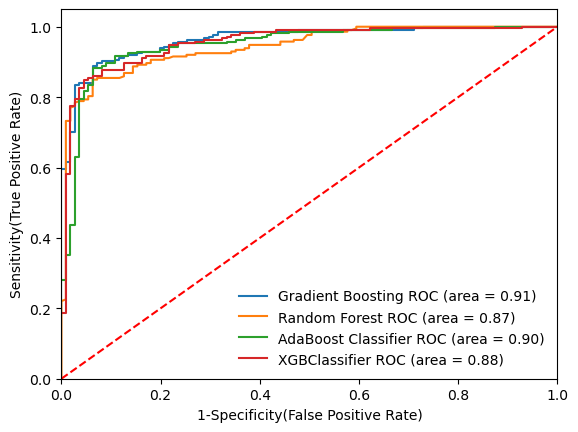

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(n_estimators=500),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(bootstrap=False, n_estimators=800, criterion="entropy"),
},

{
    'label': 'AdaBoost Classifier',
    'model': AdaBoostClassifier(learning_rate=1, n_estimators=1000),
},
{
    'label': 'XGBClassifier',
    'model': XGBClassifier(objective="binary:logistic",n_estimators=500),
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_smenn, y_train_smenn) # train the model
    y_predstack=model.predict(X_test_smenn) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test_smenn, model.predict_proba(X_test_smenn)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test_smenn,model.predict(X_test_smenn))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.legend(loc="lower right", frameon=False)
plt.show() 